# **Customer Classify with KMeans**

**Goal of this model is to classify the customer for better campaign efeciency**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import preprocessing
# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter = ';')
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


In [3]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [4]:
df['Income'] = df['Income'].astype('float')
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Income'] = df['Income'].fillna((df['Income'].mean()))
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
#total campaign accepted
df['AcceptedCmptot'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5']

#Age
#this year (example. 2015) - Year birth
df['Age'] = 2015- df['Year_Birth'] 


display(df.head(3))
print('')
display(df.tail(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,50


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,1,34
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,0,59
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,0,0,0,0,0,3,11,1,0,61


In [8]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

**Change categorical data to numeric** (I don't know if I'll use this. I'll try and make decision later)


better classify it in similar level


a. education

1 = Basic (SD),
2 = 2n Cycle (SMP/SMA/SMK/dsj.),
3 = Graduation (undergraduate/S1),
4 = Master,
5 = PhD

b.Marital status

1 = single,
2 = YOLO (you only live once),
3 = alone (jomblo, kasian),
4 = absurd (gajelas, hubungan tanpa status?),
5 = together (pacaran),
6 = married,
7 = divorced,
8 = widow

In [10]:
#kolom baru edukasi
df['ClassEd'] = np.where(df['Education']=='Basic',1,
                                    np.where(df['Education'].isin(['2n Cycle']),2,
                                    np.where(df['Education'].isin(['Graduation']),3,
                                    np.where(df['Education']=='Master',4,
                                    np.where(df['Education']=='PhD',5,6)))))

In [11]:
#kolom baru marital status
df['Class_MarS'] = df['Marital_Status'].apply(lambda x: 1 if x=='Single' 
                                 else 2 if x=='YOLO' 
                                 else 3 if x=='Alone' 
                                 else 4 if x=='Absurd' 
                                 else 5 if x=='Together'
                                 else 6 if x=='Married'
                                 else 7 if x=='Divorced'
                                 else 8 if x=='Widow'
                                 else 0)

In [12]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age,ClassEd,Class_MarS
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,58,3,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,0,61,3,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,50,3,5


# Univariate Analysis

ValueError: num must be 1 <= num <= 9, not 10

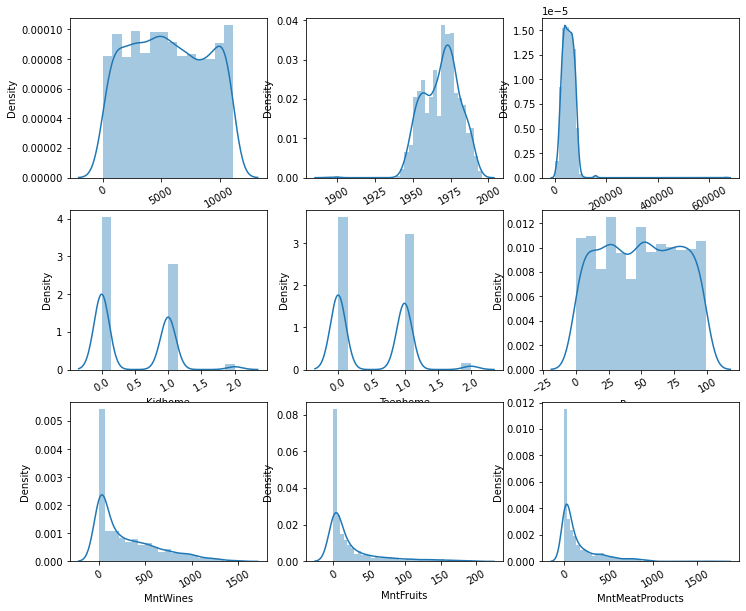

In [13]:
# Visualize numerical columns with distribution plots
plt.figure(figsize=(12, 10))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.distplot(df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

after try KMeans, I make a decision that I won't be changing categorical to numerical data.

In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'AcceptedCmptot', 'Age', 'ClassEd', 'Class_MarS'],
      dtype='object')

In [15]:
df['Recency'] = df['Recency'].astype('float')
df['MntWines'] = df['MntWines'].astype('float')
df['MntFruits'] = df['MntFruits'].astype('float')
df['MntMeatProducts'] = df['MntMeatProducts'].astype('float')
df['NumDealsPurchases'] = df['NumDealsPurchases'].astype('float')
df['NumWebPurchases'] = df['NumWebPurchases'].astype('float')
df['NumCatalogPurchases'] = df['NumCatalogPurchases'].astype('float')
df['NumStorePurchases'] = df['NumStorePurchases'].astype('float')
df['Kidhome'] = df['Kidhome'].astype('float')
df['Teenhome'] = df['Teenhome'].astype('float')
df['Year_Birth'] = df['Year_Birth'].astype('float')
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].astype('float')
df['NumStorePurchases'] = df['NumStorePurchases'].astype('float')
df['Kidhome'] = df['Kidhome'].astype('float')
df['Teenhome'] = df['Teenhome'].astype('float')
df['Year_Birth'] = df['Year_Birth'].astype('float')
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].astype('float')
df['AcceptedCmptot'] = df['AcceptedCmptot'].astype('float')
df['Complain'] = df['Complain'].astype('float')
df['Z_CostContact'] = df['Z_CostContact'].astype('float')
df['Z_Revenue'] = df['Z_Revenue'].astype('float')
df['Response'] = df['Response'].astype('float')
df.dtypes

ID                              int64
Year_Birth                    float64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                       float64
Teenhome                      float64
Dt_Customer            datetime64[ns]
Recency                       float64
MntWines                      float64
MntFruits                     float64
MntMeatProducts               float64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases             float64
NumWebPurchases               float64
NumCatalogPurchases           float64
NumStorePurchases             float64
NumWebVisitsMonth             float64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                      float64
Z_CostContac

In [25]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmptot',
       'Age'],
      dtype='object')

In [26]:
df = df[['ID',  'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
         'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
         'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
         'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
         'Z_Revenue', 'Response', 'AcceptedCmptot', 'Age']]
df.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age
0,5524,Graduation,Single,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,...,0,0,0,0,0.0,3.0,11.0,1.0,0.0,58
1,2174,Graduation,Single,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,...,0,0,0,0,0.0,3.0,11.0,0.0,0.0,61


In [18]:
newdf2 = pd.DataFrame(data= df, columns=['ID',  'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                                        'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                        'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                                        'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
                                        'Z_Revenue', 'Response', 'AcceptedCmptot', 'Age'])

In [27]:
#scaling data
newdf = pd.DataFrame(data= df, columns=['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                                        'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                        'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
                                        'Z_Revenue', 'Response', 'AcceptedCmptot', 'Age'])

sc = sklearn.preprocessing.StandardScaler()
scaledf = sc.fit_transform(newdf)

scaled_df = pd.DataFrame(scaledf, columns = newdf.columns)
display(scaled_df.head(2))

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,1.409304,2.51089,-0.550785,0.693904,-0.097282,0.0,0.0,2.388846,-0.439037,0.985345
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-1.110409,-0.56872,-1.166125,-0.130463,-0.097282,0.0,0.0,-0.418612,-0.439037,1.235733


In [28]:
scaled_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmptot',
       'Age'],
      dtype='object')

ada 23 kolom, bagi 2 jadi 11 untuk max k nya. 23 bagi 4 untuk min k nya, jadi 5

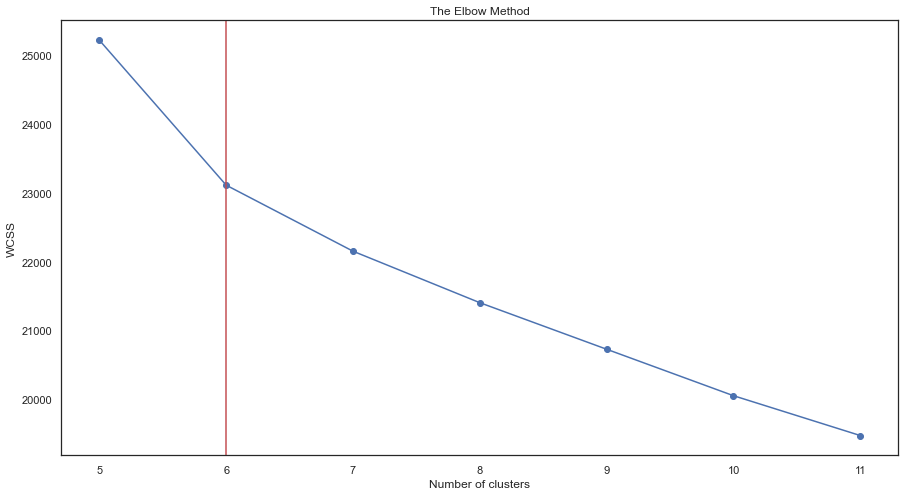

In [29]:
# membuat fungsi Elbow Method
sns.set_theme('notebook', style='white')
def elbowMethod(data, k_min=5, k_max= 11):
    wcss = [] # Within Cluster Sum of Squares
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(data)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, wcss, marker='o')

    plt.axvline(x = 6, color = 'r')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
elbowMethod(scaled_df)

ambil k=9

In [30]:
kmeans1 = KMeans(n_clusters = 6, random_state = 42).fit(scaled_df)
labels1 = kmeans1.labels_

In [31]:
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(newdf)
    score.append(kmeans.inertia_)

print('n-cluster = 6')
print()
hasilcl = newdf2.copy()
hasilcl['kmeans_4cluster'] = labels1
print('Cluster and its customers quantity :')
display(hasilcl.kmeans_4cluster.value_counts(ascending=True))
display(hasilcl[['ID', 'kmeans_4cluster']])

n-cluster = 6

Cluster and its customers quantity :


2     21
4    158
0    447
3    512
5    543
1    559
Name: kmeans_4cluster, dtype: int64

,ID,kmeans_4cluster
0,5524,0
1,2174,5
2,4141,0
3,6182,1
4,5324,1
...,...,...
2235,10870,3
2236,4001,3
2237,7270,3
2238,8235,3


In [32]:
#average of clusters
hasilcl2 = hasilcl[['ID', 'kmeans_4cluster', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                  'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmptot',
                  'Age']].copy()

analysis_res = hasilcl2.groupby('kmeans_4cluster').agg({'mean'})
analysis_res['Banyak_cust'] = hasilcl2.groupby('kmeans_4cluster')['ID'].count()
display(analysis_res)

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age,Banyak_cust
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,
kmeans_4cluster,,,,,,,,,,,,,,,,,,,,,
0,5676.060403,74734.085586,0.046980,0.203579,50.876957,493.935123,71.919463,438.237136,104.362416,72.968680,...,5.731544,8.485459,2.751678,0.0,3.0,11.0,0.109620,0.208054,47.237136,447
1,5613.048301,29859.857347,0.860465,0.005367,48.559928,34.935599,6.642218,27.763864,9.932021,6.783542,...,0.529517,3.157424,6.957066,0.0,3.0,11.0,0.125224,0.089445,36.463327,559
2,6722.714286,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,17.523810,...,2.047619,5.238095,5.809524,1.0,3.0,11.0,0.142857,0.142857,49.904762,21
3,5486.828125,59057.631361,0.203125,0.960938,48.146484,511.251953,21.679688,142.119141,29.005859,22.714844,...,3.283203,8.017578,5.769531,0.0,3.0,11.0,0.113281,0.277344,50.507812,512
4,5596.101266,80457.039566,0.050633,0.120253,44.518987,877.196203,57.208861,465.151899,82.221519,62.126582,...,6.297468,7.898734,3.335443,0.0,3.0,11.0,0.791139,2.113924,44.860759,158
5,5556.036832,42424.012911,0.675875,0.953959,50.311234,67.386740,4.436464,25.662983,6.394107,4.416206,...,0.710866,3.589319,5.869245,0.0,3.0,11.0,0.053407,0.082873,51.530387,543


In [33]:
analysis_res.columns

MultiIndex([(                 'ID', 'mean'),
            (             'Income', 'mean'),
            (            'Kidhome', 'mean'),
            (           'Teenhome', 'mean'),
            (            'Recency', 'mean'),
            (           'MntWines', 'mean'),
            (          'MntFruits', 'mean'),
            (    'MntMeatProducts', 'mean'),
            (    'MntFishProducts', 'mean'),
            (   'MntSweetProducts', 'mean'),
            (       'MntGoldProds', 'mean'),
            (  'NumDealsPurchases', 'mean'),
            (    'NumWebPurchases', 'mean'),
            ('NumCatalogPurchases', 'mean'),
            (  'NumStorePurchases', 'mean'),
            (  'NumWebVisitsMonth', 'mean'),
            (           'Complain', 'mean'),
            (      'Z_CostContact', 'mean'),
            (          'Z_Revenue', 'mean'),
            (           'Response', 'mean'),
            (     'AcceptedCmptot', 'mean'),
            (                'Age', 'mean'),
          

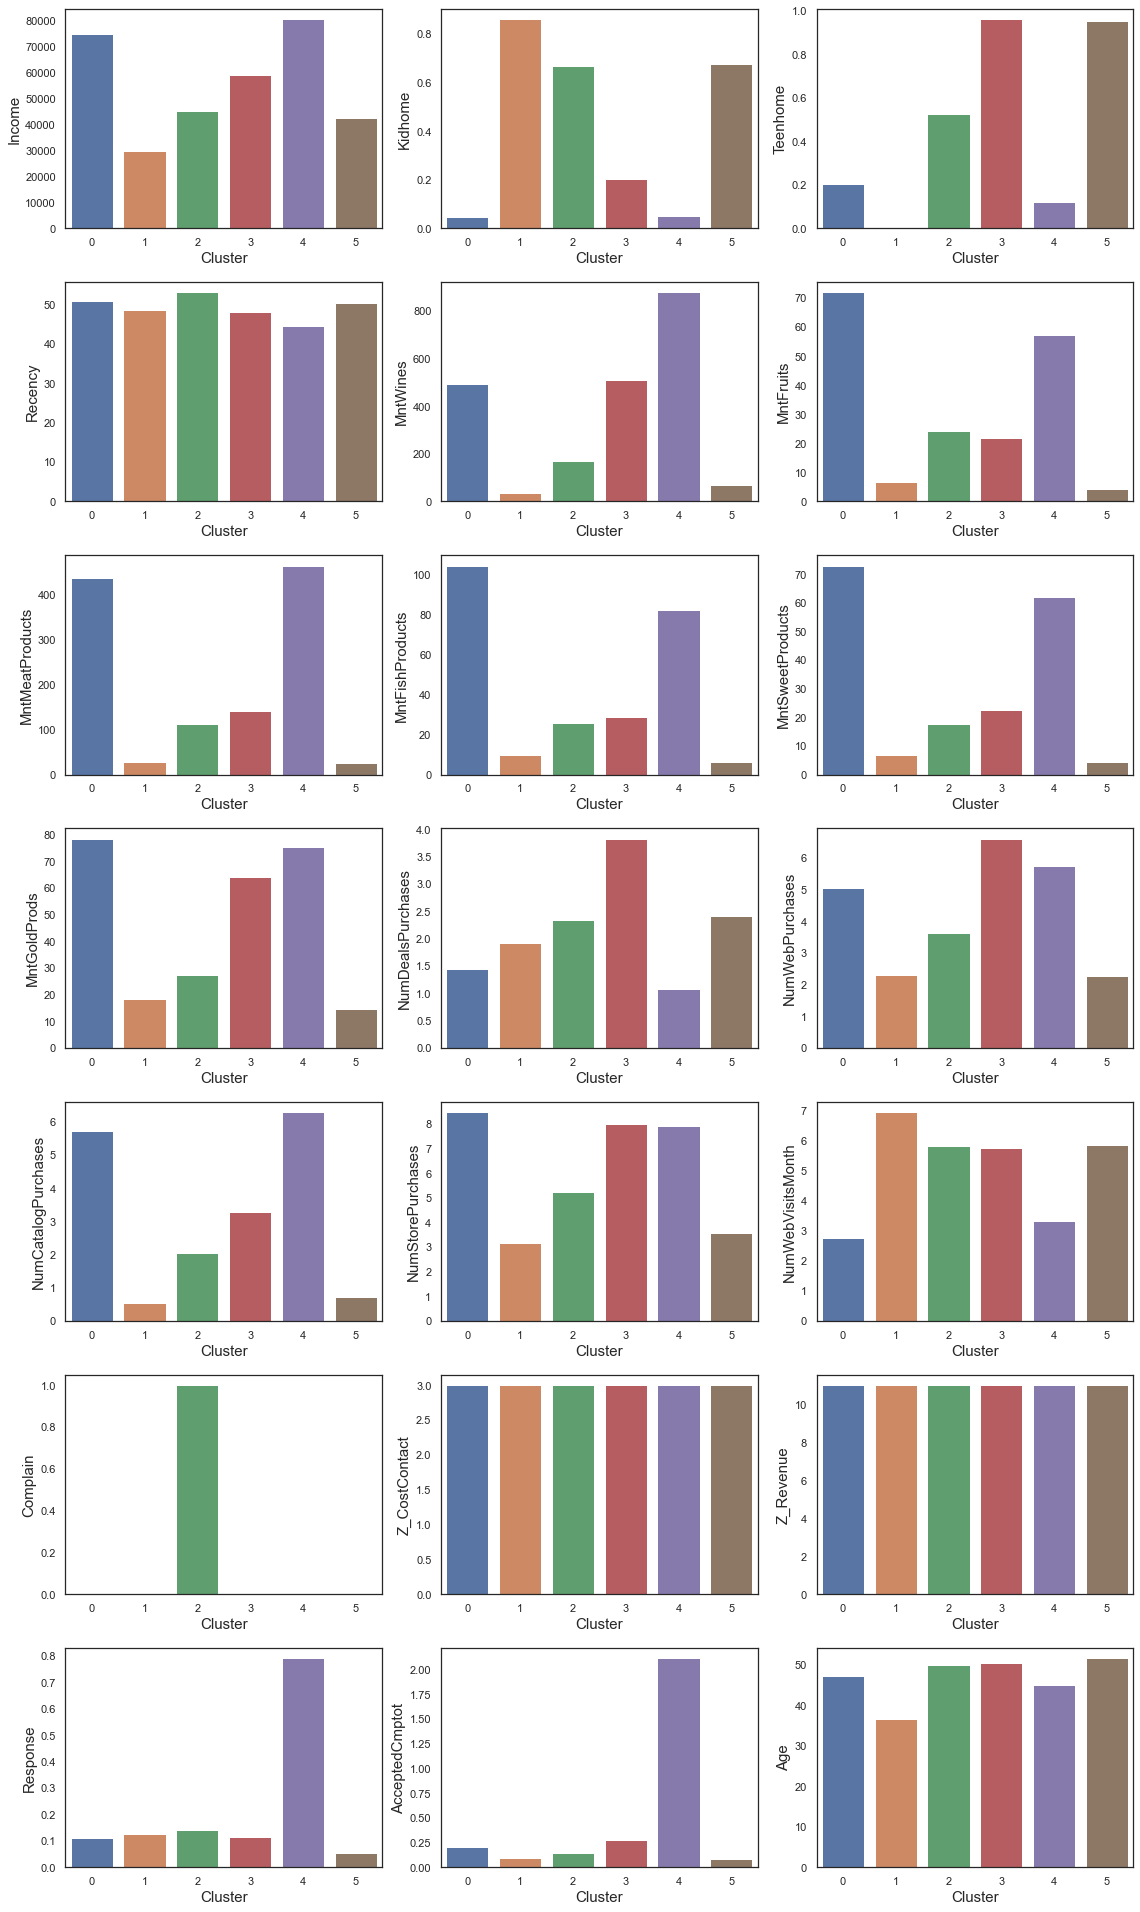

In [34]:
# Visualisasi 
plt.figure(figsize=(16, 30))
for i, var in enumerate(newdf.columns):
    plt.subplot(8,3,i+1)
    sns.barplot(x = analysis_res.reset_index().kmeans_4cluster, y = analysis_res[var]['mean'])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()

In [51]:
hasilcl3 = hasilcl[['kmeans_4cluster', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'MntGoldProds', 'Age']].copy()
hasilcl3.head(3)

,kmeans_4cluster,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,0,58138.0,0.0,0.0,635.0,88.0,546.0,172,88,88,58
1,5,46344.0,1.0,1.0,11.0,1.0,6.0,2,1,6,61
2,0,71613.0,0.0,0.0,426.0,49.0,127.0,111,21,42,50


In [52]:
hasilcl4 = hasilcl[['kmeans_4cluster', 'Income', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                  'AcceptedCmptot', 'Age']].copy()
hasilcl3.head(3)

,kmeans_4cluster,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,0,58138.0,0.0,0.0,635.0,88.0,546.0,172,88,88,58
1,5,46344.0,1.0,1.0,11.0,1.0,6.0,2,1,6,61
2,0,71613.0,0.0,0.0,426.0,49.0,127.0,111,21,42,50


<Figure size 1440x1728 with 0 Axes>

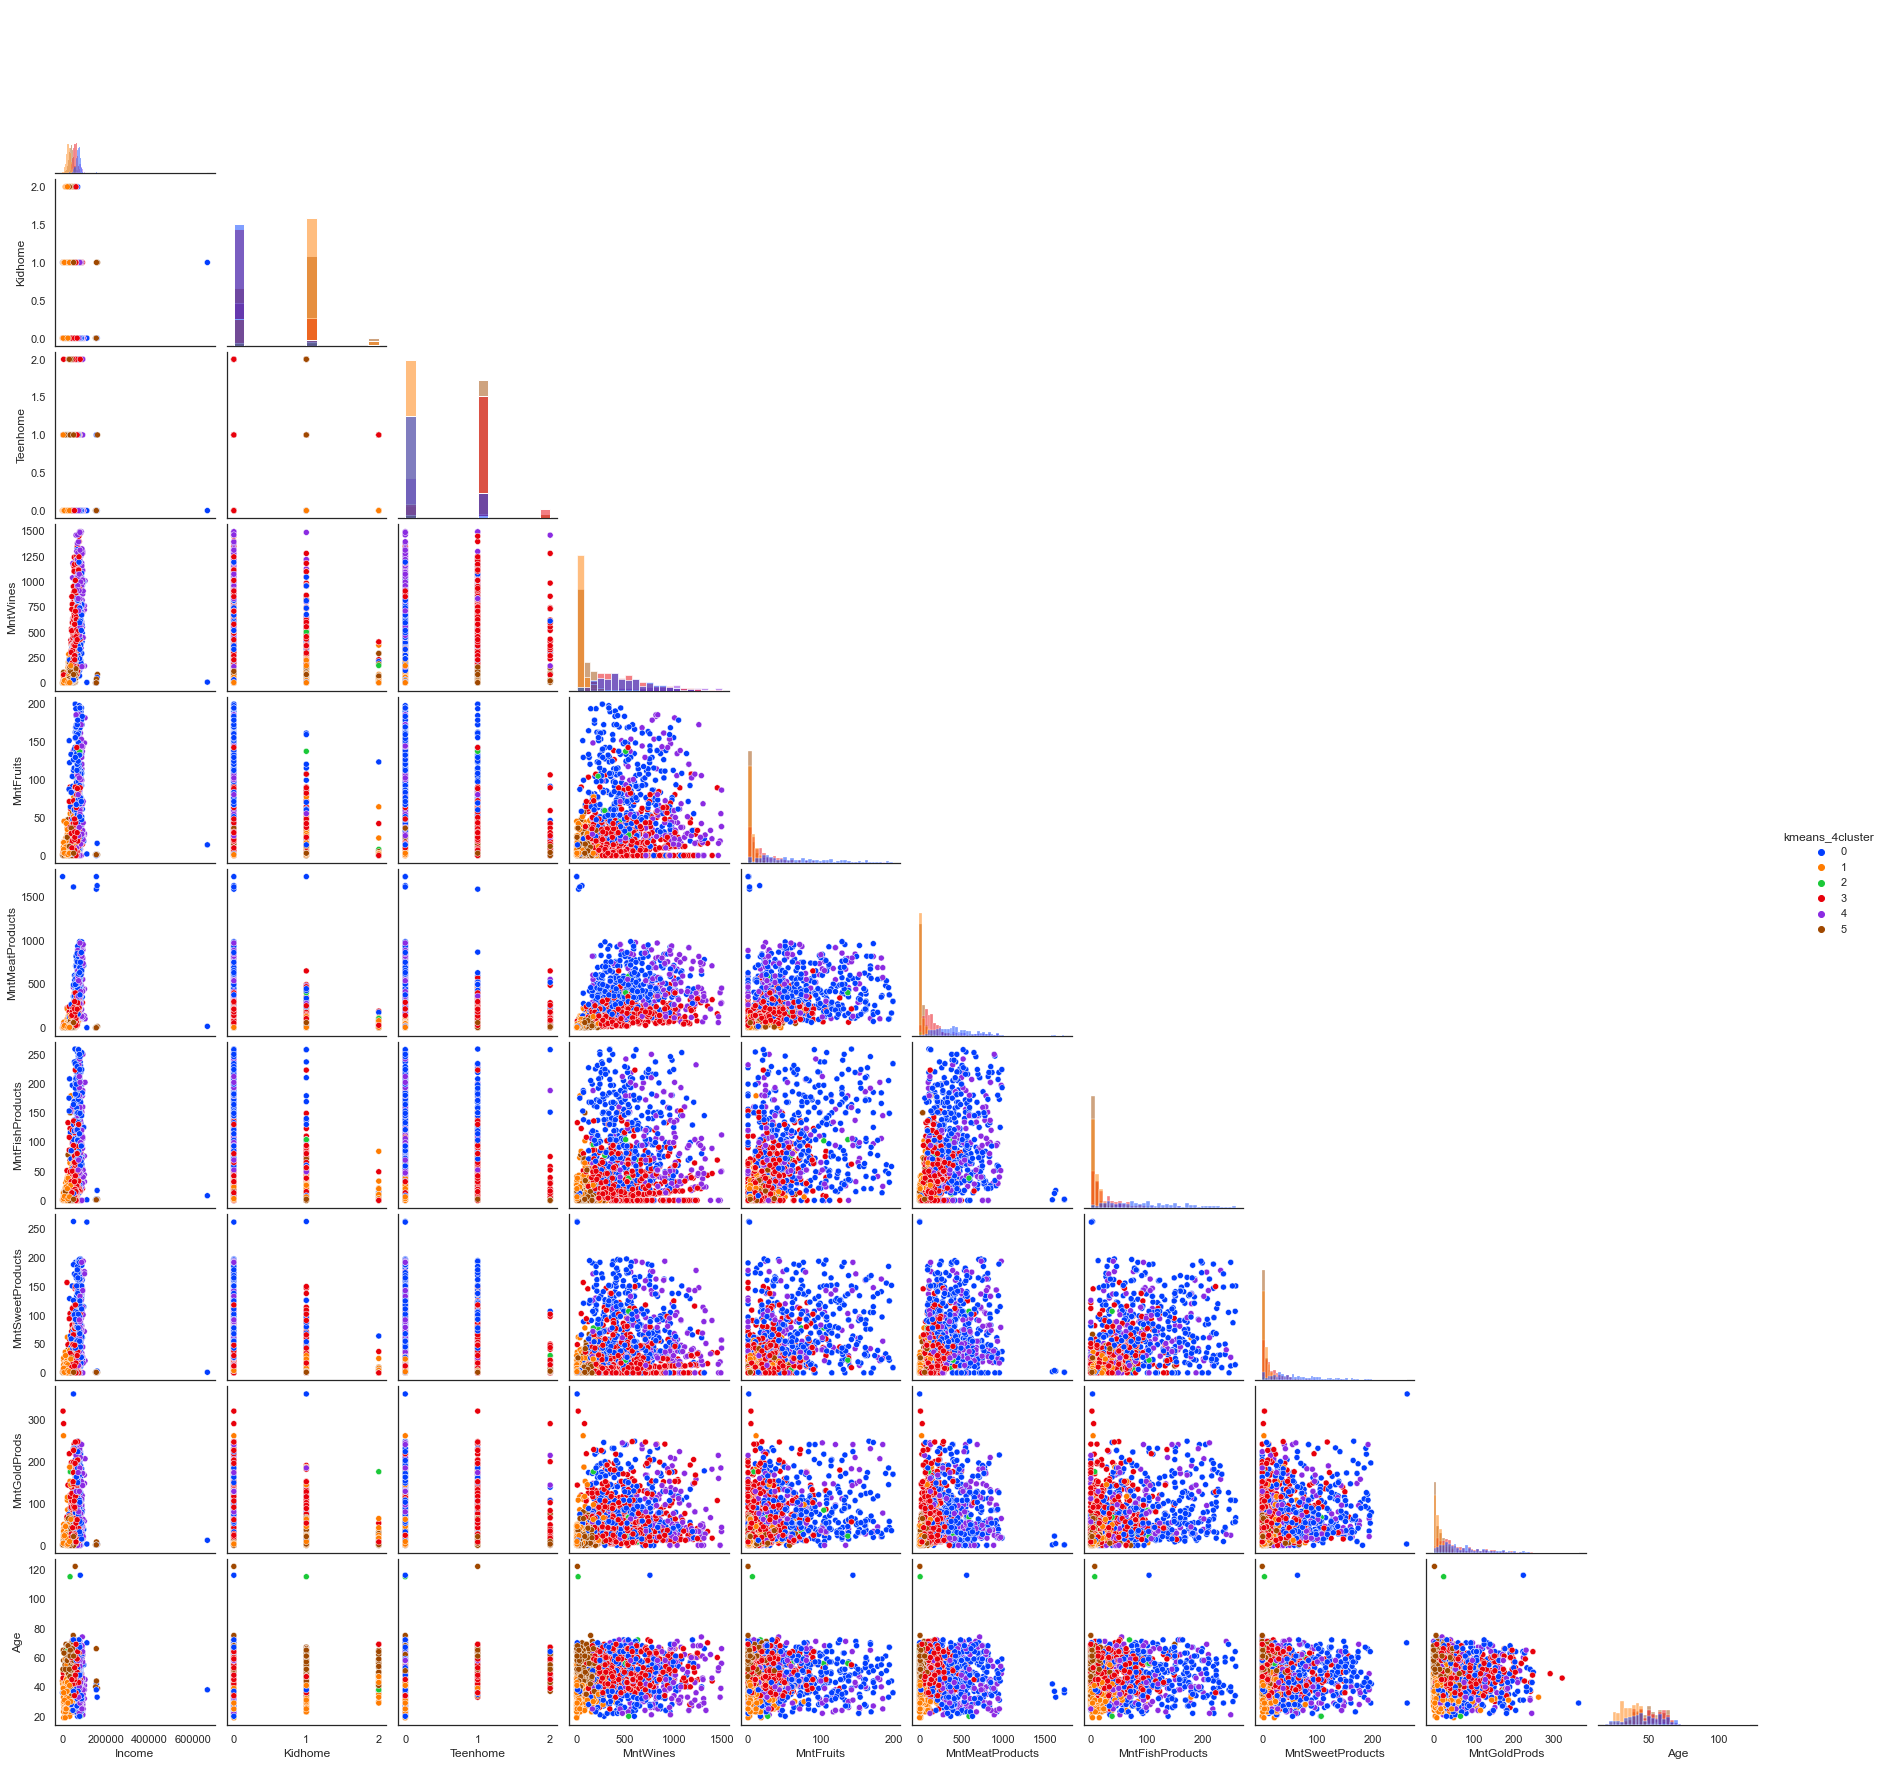

In [56]:
plt.figure(figsize=(20,24))
sns.set_theme('notebook', style='white')
sns.set_palette("bright")
g = sns.pairplot(hasilcl3, hue="kmeans_4cluster", diag_kind="hist", corner=True, palette = 'bright')
plt.show()

<Figure size 1440x1728 with 0 Axes>

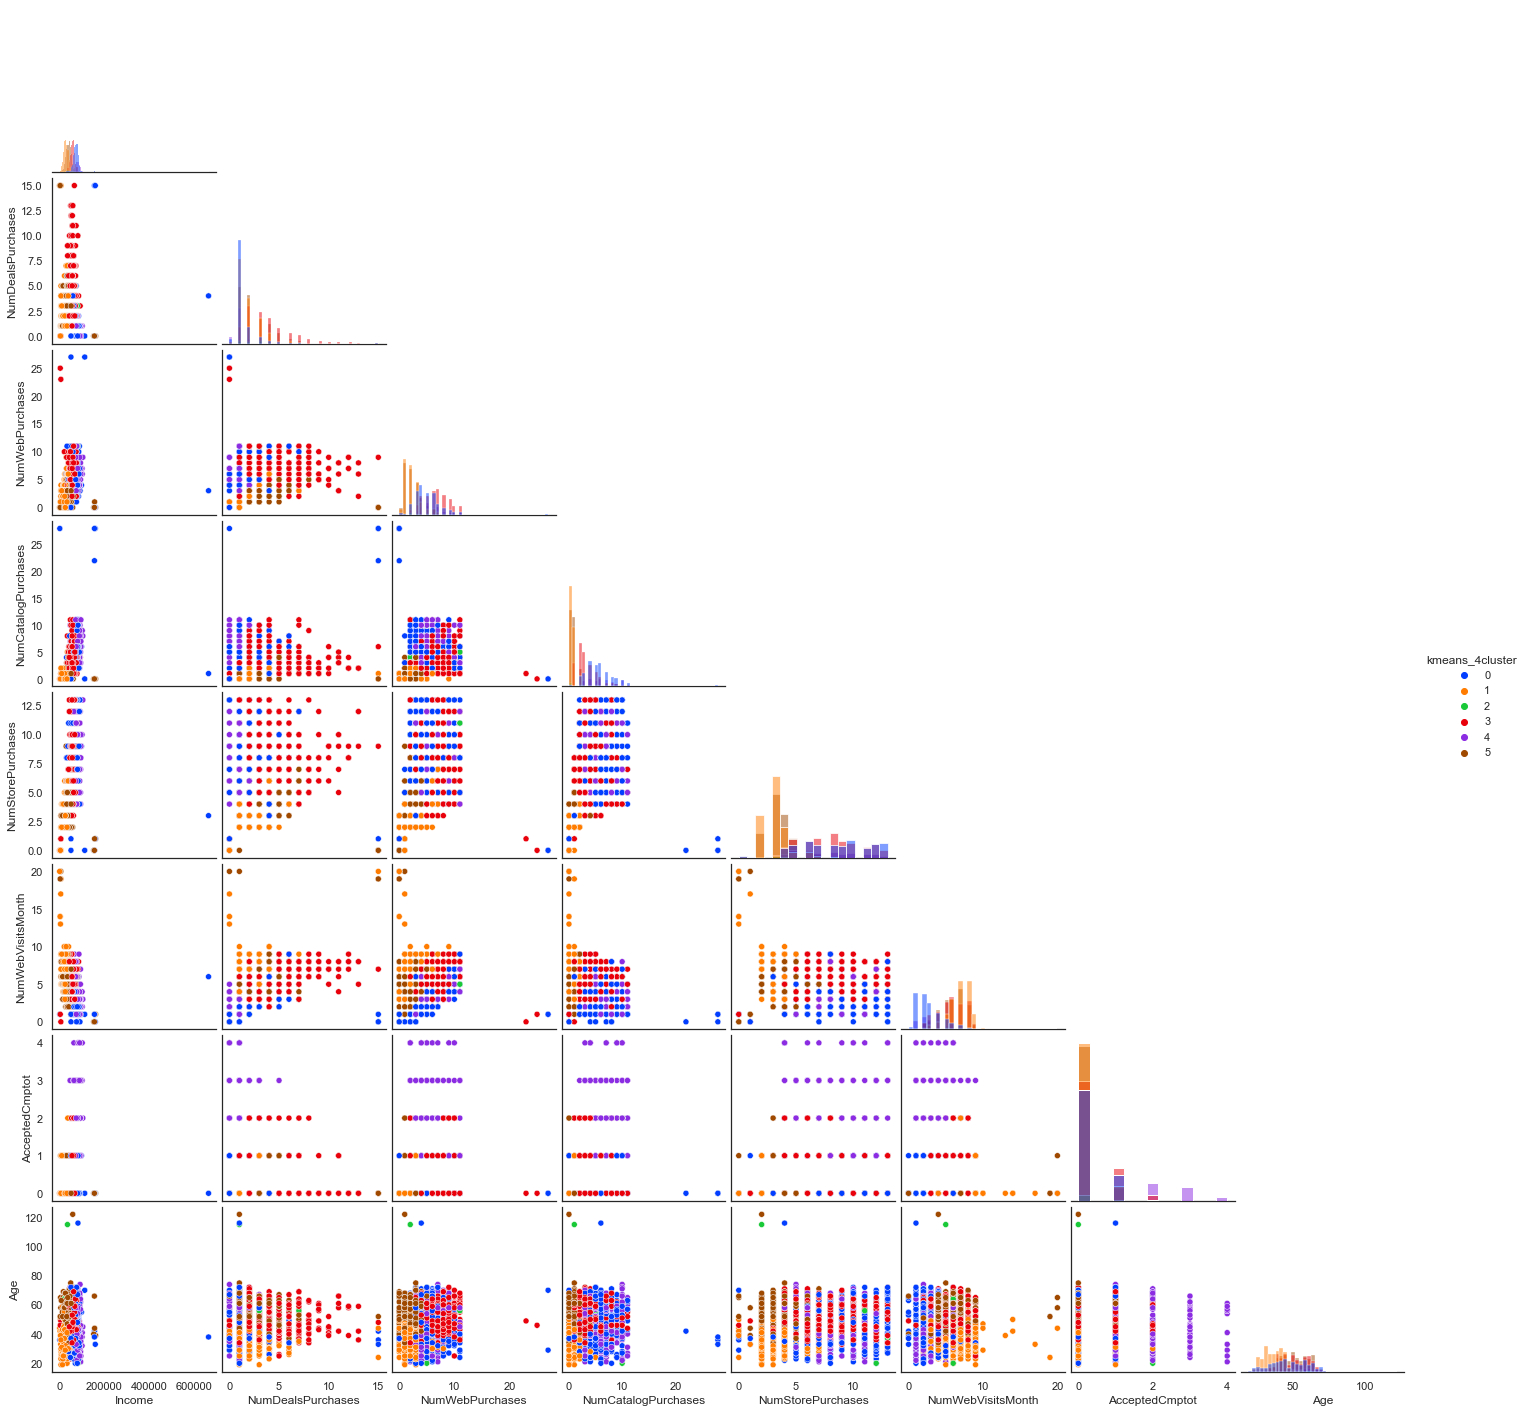

In [55]:
plt.figure(figsize=(20,24))
sns.set_theme('notebook', style='white')
sns.set_palette("bright")
g = sns.pairplot(hasilcl4, hue="kmeans_4cluster", diag_kind="hist", corner=True, palette = 'bright')
plt.show()

**Cluster Description**

chara ...

 
cluster 0:
avg income 75000, have avg about 0.05 kid and 0.2 teen, last purchase avg 50 days, moderate wine, high fruit, high meat, high fish, high sweet, high gold, less purchase w discount, moderate web purchase, high catalog purchase, high store purchase, less web visit, no complains, less response and acpt campaign, avg age 47.

cluster 1:
avg income 30000, have avg about 1 kid and mostly don't have teen (0.01), last purchase avg 49 days, less wine, less fruit, less meat, less fish, less sweet, moderate gold, moderate purchase w discount, less web purchase, less catalog purchase, less store purchase, high web visit, no complains, less response and acpt campaign, avg age 46.

cluster 2:
avg income 45000, have avg about 0.6 kid and 0.5 teen (equal), last purchase avg 53 days, less wine, less fruit, less meat, less fish, less sweet, less gold, moderate purchase w discount, less web purchase, less catalog purchase, moderate store purchase, moderate web visit, avg 1 complains, less response and acpt campaign, avg age 49.

cluster 3:
avg income 59000, have avg about 0.2 kid (most dont have) and 1 teen, last purchase avg 48 days, moderate wine, less fruit, less meat, less fish, less sweet, high gold, high purchase w discount, high web purchase, moderate catalog purchase, high store purchase, moderate web visit, no complains, less response and acpt campaign, avg age 50.

cluster 4:
avg income 80500, have avg about 0.1 kid (most dont have) and 0.1 teen(most dont have), last purchase avg 44 days, high wine, moderate fruit, high meat, moderate fish, high sweet, high gold, less purchase w discount, high web purchase, high catalog purchase, high store purchase, less web visit, no complains, high response and acpt campaign, avg age 45.

cluster 5:
avg income 42500, have avg about 0.7 kid and 1 teen, last purchase avg 50 days, less wine, moderate fruit, less meat, less fish, less sweet, less gold, moderate purchase w discount, less web purchase, less catalog purchase, less store purchase, moderate web visit, no complains, less response and acpt campaign, avg age 50.

In [42]:
data = {'cluster' : [0, 1, 2, 3, 4, 5],
        'avg_income' : [75000, 30000, 45000, 59000, 80500, 42500],
        'kid' : [0.05, 1, 0.6, 0.2, 0.1, 0.7], 
        'teen' : [0.2, 0.01, 0.5, 1, 0.1, 1],
        'child_conclusion' : ['most dont have any', 'most have kid', 'equal', 'most have teen', 'most dont have any', 'most have kid and teen'],
        'last_buy' :[50, 49, 53, 48, 44, 50], 
        'wine_buy' : ['moderate', 'less', 'less', 'moderate', 'high', 'less'], 
        'fruit_buy' : ['high', 'less', 'less', 'less', 'moderate', 'moderate'], 
        'meat_buy' : ['high', 'less', 'less', 'less', 'high', 'less'],
        'fish_buy' : ['high', 'less', 'less', 'less', 'moderate', 'less'], 
        'sweet_buy' : ['high', 'less', 'less', 'less', 'high', 'less'], 
        'gold_buy' : ['high', 'moderate', 'less', 'high', 'high', 'less'],
        'buy_wdiscount' : ['less', 'moderate', 'moderate', 'high', 'less', 'moderate'], 
        'catalog_purc' : ['high', 'less', 'less', 'moderate', 'high', 'less'], 
        'web_purc' : ['moderate', 'less', 'less', 'high', 'high', 'less'],
        'store_purc' : ['high', 'less', 'moderate', 'high', 'high', 'less'],
        'web_visit' : ['less', 'high', 'moderate', 'moderate', 'less', 'moderate'], 
        'avg_complains' : [0,0,1,0,0,0], 
        'response_acpt_campaign' : ['less,less','less, less', 'less, less', 'less, less', 'high, high', 'less, less'], 
        'avg_age' : [47, 46, 49, 50, 45, 50]}

hasil = pd.DataFrame(data)
hasil

,cluster,avg_income,kid,teen,child_conclusion,last_buy,wine_buy,fruit_buy,meat_buy,fish_buy,sweet_buy,gold_buy,buy_wdiscount,catalog_purc,web_purc,store_purc,web_visit,avg_complains,response_acpt_campaign,avg_age
0,0,75000,0.05,0.20,most dont have any,50,moderate,high,high,high,high,high,less,high,moderate,high,less,0,"less,less",47
1,1,30000,1.00,0.01,most have kid,49,less,less,less,less,less,moderate,moderate,less,less,less,high,0,"less, less",46
2,2,45000,0.60,0.50,equal,53,less,less,less,less,less,less,moderate,less,less,moderate,moderate,1,"less, less",49
3,3,59000,0.20,1.00,most have teen,48,moderate,less,less,less,less,high,high,moderate,high,high,moderate,0,"less, less",50
4,4,80500,0.10,0.10,most dont have any,44,high,moderate,high,moderate,high,high,less,high,high,high,less,0,"high, high",45
5,5,42500,0.70,1.00,most have kid and teen,50,less,moderate,less,less,less,less,moderate,less,less,less,moderate,0,"less, less",50


from table 'hasil' and pairplot, we can conclude that customers that have child mostly have low income with less buying and more purchase with discount. customers with high income mostly have less web visit but moderate to high web purchase.

Now, from this customer clustering, ...

example: 
if we want to campaign about 'healthy family saving package', we can share the campaign to cluster group 1 and 2 because have less wine consumption with lower income and moderate discount purchase. Then, we should share this in our website in their account because they have moderate to high web visit rate.


I'm sorry if I have bad English.

In [60]:
#customers in group 1 & 2
cust_pil = hasilcl[(hasilcl2['kmeans_4cluster']==1) | (hasilcl['kmeans_4cluster']==2)]

cust_pil

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmptot,Age,kmeans_4cluster
3,6182,Graduation,Together,26646.000000,1.0,0.0,26.0,11.0,4.0,20.0,...,0,0,0,0.0,3.0,11.0,0.0,0.0,31,1
4,5324,PhD,Married,58293.000000,1.0,0.0,94.0,173.0,43.0,118.0,...,0,0,0,0.0,3.0,11.0,0.0,0.0,34,1
7,6177,PhD,Married,33454.000000,1.0,0.0,32.0,76.0,10.0,56.0,...,0,0,0,0.0,3.0,11.0,0.0,0.0,30,1
8,4855,PhD,Together,30351.000000,1.0,0.0,19.0,14.0,0.0,24.0,...,0,0,0,0.0,3.0,11.0,1.0,0.0,41,1
10,1994,Graduation,Married,52247.251354,1.0,0.0,11.0,5.0,5.0,6.0,...,0,0,0,0.0,3.0,11.0,0.0,0.0,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10659,2n Cycle,Together,7500.000000,1.0,0.0,7.0,2.0,8.0,11.0,...,0,0,0,0.0,3.0,11.0,0.0,0.0,36,1
2229,10084,Graduation,Married,24434.000000,2.0,0.0,9.0,3.0,2.0,8.0,...,0,0,0,0.0,3.0,11.0,0.0,0.0,43,1
2230,7004,Graduation,Single,11012.000000,1.0,0.0,82.0,24.0,3.0,26.0,...,0,0,0,0.0,3.0,11.0,0.0,1.0,31,1
2232,8080,Graduation,Single,26816.000000,0.0,0.0,50.0,5.0,1.0,6.0,...,0,0,0,0.0,3.0,11.0,0.0,0.0,29,1
